<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/SAE_12_7_integral_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 5.6 MB/s eta 0:00:00


In [2]:
from control import tf, tf2ss, forced_response, pzmap, tfdata, feedback, ss
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

5001
(2, 5001)


<ipython-input-4-20d24cf85f12>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yplt[i] = y


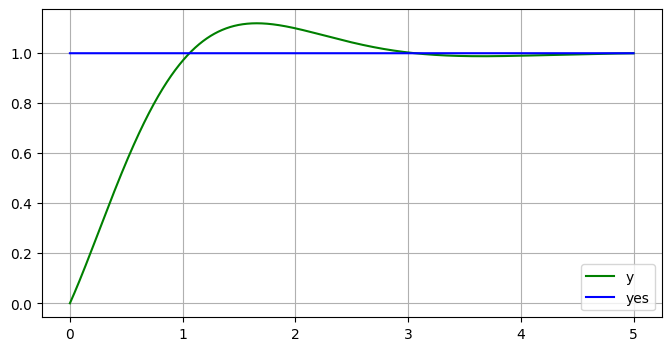

In [4]:
# Define your plant in phase variable form:
A = np.array([[0, 1],[-7, -9]])
B = np.array([[0],[1]])
C = np.array([4, 1])
D = np.array([0])
K = np.array([2.21, -2.7])
ke = 3.79


x = np.array([[0],[0]])#np.zeros((A.shape[0], 1))
u = 0
r = 1
xN = 0

# simulate
t0 = 0
t1 = 5           # remeber that Ts is 1 sec
dt = 0.001
nt = int( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)


#print(x.reshape(-1,1))
print(t.shape[0])
rplt = np.zeros(t.shape[0])
yplt = np.zeros(t.shape[0])
rplt = np.zeros(t.shape[0])
yplt = np.zeros(t.shape[0])
yesplt = np.zeros(t.shape[0])
explt = np.zeros((A.shape[0], t.shape[0]))
print(explt.shape)

for i in range(t.shape[0]):
  # model
  xdot = np.dot(A, x) + B * u        #state equation
  x = x + xdot * dt
  y = np.dot(C,x)+ D * u             # output equation

  #u = r - np.dot(K,x)             # state feedback
  #u = r - y                       # controller using output feedback
  xNdot = r - y                    # integral coontrol
  xN = xN + xNdot * dt
  u = r - np.dot(K,x) + ke * xN

  yplt[i] = y
  rplt[i] = r

# plot results
plt.figure(figsize=(8, 4))
plt.plot(t, yplt, 'green')
plt.plot(t, rplt, 'blue')
#plt.ylim(0, 0.002)
plt.grid()
plt.legend(['y','yes'])
plt.show()

In [21]:
# plot roots (eigenvalues) of the system matrix of controlled system and observer
print(np.outer(B, ke))
print(A-np.outer(B, K))
print(-C)
print(np.zeros(1))

print([A-np.outer(B, K), np.outer(B, ke)])

sys_matrix = np.concatenate((A-np.outer(B, K), np.outer(B, ke)), axis=0)
print(sys_matrix)
#sys_matrix = np.concatenate([[A-np.outer(B, K), np.outer(B, ke)],[-C, [0]]])



sys_eigenvalues, _ = np.linalg.eig(A)

print("Eigenvalues (Roots) of A:", sys_eigenvalues)

cont_sys_eigenvalues, _ = np.linalg.eig(sys_matrix)

print("Eigenvalues (Roots) of A:", cont_sys_eigenvalues)

plt.figure(figsize=(10, 6))
# Plot the real part vs. the imaginary part of the eigenvalues
plt.plot(sys_eigenvalues.real, sys_eigenvalues.imag, 'ro')  # 'ro' plots red dots
plt.plot(obs_eigenvalues.real, cont_sys_eigenvalues.imag, 'go')  # 'ro' plots red dots

# Add grid, labels, and make sure the aspect ratio is equal
plt.grid(True)
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Eigenvalues in the Complex Plane')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(['sys','obs'])

# Show the plot
plt.show()


[[0.  ]
 [3.79]]
[[ 0.    1.  ]
 [-9.21 -6.3 ]]
[-4 -1]
[0.]
[array([[ 0.  ,  1.  ],
       [-9.21, -6.3 ]]), array([[0.  ],
       [3.79]])]


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 1